# Telecom Churn - Case Study

## Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Content - 

- <a href="#Initial-Data-Understanding">Initial Data Understanding</a>
- <a href="#Filter-High-Value-Customers">Filter High Value Customers</a>
- <a href="#Derived-metrics">Derived Metrics</a>
- <a href="#EDA">EDA</a>
- <a href="#Data-Preparation-for-training">Data Preparation for training</a>
- <a href="#Model-Building">Model Building</a>
- <a href="#Conclusion">Conclusion</a>
- <a href="#Business-Insights">Business Insights</a>

In [1]:
# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -mpip install statsmodels
# !{sys.executable} -mpip install imbalanced-learn

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# show multiple outputs in jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime

### Initial Data Understanding

In [4]:
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")
telecom_churn_data.head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
1      7001865778        109             0.0             0.0             0.0   
2      7001625959        109             0.0             0.0             0.0   
3      7001204172        109             0.0             0.0             0.0   
4      7000142493        109             0.0             0.0             0.0   
5      7000286308        109             0.0             0.0             0.0   
6      7001051193        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
9      7001864400        109             0.0             0.0             0.0   
10     7000471350        109             0.0             0.0             0.0   
11     7002006969        109             0.0             0.0             0.0   
12     7001419799        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
14     7001654241        109             0.0             0.0             0.0   
15     7002070365        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
18     7001678155        109             0.0             0.0             0.0   
19     7001754084        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   
5             6/30/2014            7/31/2014            8/31/2014   
6             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
9             6/30/2014            7/31/2014            8/31/2014   
10            6/30/2014            7/31/2014            8/31/2014   
11            6/30/2014            7/31/2014            8/31/2014   
12            6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
14            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   
18            6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
1             9/30/2014    34.047   355.074   268.321   86.285        24.11   
2             9/30/2014   167.690   189.058   210.226  290.714        11.54   
3             9/30/2014   221.338   251.102   508.054  389.500        99.91   
4             9/30/2014   261.636   309.876   238.174  163.426        50.31   
5             9/30/2014    50.258    58.810    83.386  170.826        50.16   
6             9/30/2014   429.023   190.704   255.114  114.751        71.03   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
9             9/30/2014   119.518   247.435   170.231  160.042        33.89   
10  

In [5]:
telecom_churn_data.shape

(99999, 226)

In [6]:
telecom_churn_data.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [7]:
telecom_churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In total, 99999 rows and 226 columns in the data. We need to check if there are any categorical columns

In [8]:
telecom_churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [9]:
# We will create a copy of original data.
original_df = telecom_churn_data.copy()

#### Filter High Value Customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 
As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: **Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**


In [10]:
# total data recharge amount for June and July
telecom_churn_data['total_rech_data_amt_6'] = telecom_churn_data.av_rech_amt_data_6 * telecom_churn_data.total_rech_data_6
telecom_churn_data['total_rech_data_amt_7'] = telecom_churn_data.av_rech_amt_data_7 * telecom_churn_data.total_rech_data_7

In [11]:
# total recharge amount for June and July
telecom_churn_data['amt_data_6'] = telecom_churn_data.total_rech_amt_6.fillna(0) + telecom_churn_data.total_rech_data_amt_6.fillna(0)
telecom_churn_data['amt_data_7'] = telecom_churn_data.total_rech_amt_7.fillna(0) + telecom_churn_data.total_rech_data_amt_7.fillna(0)

In [12]:
# average recharge done in June and July
telecom_churn_data['av_amt_data_6_7'] = (telecom_churn_data.amt_data_6 + telecom_churn_data.amt_data_7)/2

In [13]:
# 70th percentile of the calculated average amount
percentile_70_6n7 = telecom_churn_data.av_amt_data_6_7.quantile(0.7)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  478.0


In [14]:
# filter the given data set based on 70th percentile
churn_hv = telecom_churn_data.loc[telecom_churn_data.av_amt_data_6_7 >= telecom_churn_data.av_amt_data_6_7.quantile(0.7), :]
churn_hv = churn_hv.reset_index(drop=True)
churn_hv.shape

(30001, 231)

### Derived metrics

#### Churn Metric

In [15]:
# total incoming and outgoing minutes of usage
churn_hv['total_calls_mou_9'] = churn_hv.total_ic_mou_9 + churn_hv.total_og_mou_9

In [16]:
# total 2g and 3g data consumption
churn_hv['total_internet_mb_9'] =  churn_hv.vol_2g_mb_9 + churn_hv.vol_3g_mb_9

In [17]:
# 0 - not churn, 1 - churn
churn_hv['churn'] = churn_hv.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [18]:
churn_hv.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7000701601        109             0.0             0.0   
2         7001524846        109             0.0             0.0   
3         7002124215        109             0.0             0.0   
4         7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
29996     7000630859        109             0.0             0.0   
29997     7000661676        109             0.0             0.0   
29998     7001729035        109             0.0             0.0   
29999     7002111859        109             0.0             0.0   
30000     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
29996             0.0            6/30/2014            7/31/2014   
29997             0.0            6/30/2014            7/31/2014   
29998             0.0            6/30/2014            7/31/2014   
29999             0.0            6/30/2014            7/31/2014   
30000             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0                8/31/2014            9/30/2014   197.385   214.816   213.803   
1                8/31/2014            9/30/2014  1069.180  1349.850  3171.480   
2                8/31/2014            9/30/2014   378.721   492.223   137.362   
3                8/31/2014            9/30/2014   514.453   597.753   637.760   
4                8/31/2014            9/30/2014    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
29996            8/31/2014            9/30/2014   384.316   255.405   393.474   
29997            8/31/2014            9/30/2014   328.594   202.966   118.707   
29998            8/31/2014            9/30/2014   644.973   455.228   564.334   
29999            8/31/2014            9/30/2014   312.558   512.932   402.080   
30000            8/31/2014            9/30/2014   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1      500.000        57.84        54.68        52.29          NaN   
2      166.787       413.69       351.03        35.08        33.46   
3      578.596       102.41       132.11        85.14       161.63   
4      811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
29996   94.080        78.68        29.04       103.24        34.38   
29997  324.143       423.99       181.83         5.71         5.03   
29998  267.451       806.73       549.36       775.41       692.63   
29999  533.502       199.89       174.46         2.46         7.16   
30000  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1            453.43        567.16        325.91           NaN          16.23   
2             94.66         80.63        136.48        108.71           0.00   
3            757.93        896.68        983.39        869.89           0.00   
4             85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
29996         56.13    

In [19]:
# churn vs non churn percentage
churn_hv['churn'].value_counts()/len(churn_hv)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

92% of the customers do not churn. This also points us to **class imbalance**.

If the usage drops in the recent month, as compared to previous month then there might be high chances of churn.

In [20]:
# Current month - Average of previous months

churn_hv['total_rech_num_diff'] = churn_hv.total_rech_num_8 - ((churn_hv.total_rech_num_6 + churn_hv.total_rech_num_7)/2)

churn_hv['total_rech_amt_diff'] = churn_hv.total_rech_amt_8 - ((churn_hv.total_rech_amt_6 + churn_hv.total_rech_amt_7)/2)

churn_hv['vol_2g_mb_diff'] = churn_hv.vol_2g_mb_8 - ((churn_hv.vol_2g_mb_6 + churn_hv.vol_2g_mb_7)/2)

churn_hv['vol_3g_mb_diff'] = churn_hv.vol_3g_mb_8 - ((churn_hv.vol_3g_mb_6 + churn_hv.vol_3g_mb_7)/2)

churn_hv['arpu_diff'] = churn_hv.arpu_8 - ((churn_hv.arpu_6 + churn_hv.arpu_7)/2)

churn_hv['onnet_mou_diff'] = churn_hv.onnet_mou_8 - ((churn_hv.onnet_mou_6 + churn_hv.onnet_mou_7)/2)

churn_hv['offnet_mou_diff'] = churn_hv.offnet_mou_8 - ((churn_hv.offnet_mou_6 + churn_hv.offnet_mou_7)/2)

churn_hv['roam_og_mou_diff'] = churn_hv.roam_og_mou_8 - ((churn_hv.roam_og_mou_6 + churn_hv.roam_og_mou_7)/2)

churn_hv['loc_og_mou_diff'] = churn_hv.loc_og_mou_8 - ((churn_hv.loc_og_mou_6 + churn_hv.loc_og_mou_7)/2)

churn_hv['std_og_mou_diff'] = churn_hv.std_og_mou_8 - ((churn_hv.std_og_mou_6 + churn_hv.std_og_mou_7)/2)

churn_hv['isd_og_mou_diff'] = churn_hv.isd_og_mou_8 - ((churn_hv.isd_og_mou_6 + churn_hv.isd_og_mou_7)/2)

churn_hv['spl_og_mou_diff'] = churn_hv.spl_og_mou_8 - ((churn_hv.spl_og_mou_6 + churn_hv.spl_og_mou_7)/2)

churn_hv['total_og_mou_diff'] = churn_hv.total_og_mou_8 - ((churn_hv.total_og_mou_6 + churn_hv.total_og_mou_7)/2)

churn_hv['roam_ic_mou_diff'] = churn_hv.roam_ic_mou_8 - ((churn_hv.roam_ic_mou_6 + churn_hv.roam_ic_mou_7)/2)

churn_hv['loc_ic_mou_diff'] = churn_hv.loc_ic_mou_8 - ((churn_hv.loc_ic_mou_6 + churn_hv.loc_ic_mou_7)/2)

churn_hv['std_ic_mou_diff'] = churn_hv.std_ic_mou_8 - ((churn_hv.std_ic_mou_6 + churn_hv.std_ic_mou_7)/2)

churn_hv['isd_ic_mou_diff'] = churn_hv.isd_ic_mou_8 - ((churn_hv.isd_ic_mou_6 + churn_hv.isd_ic_mou_7)/2)

churn_hv['spl_ic_mou_diff'] = churn_hv.spl_ic_mou_8 - ((churn_hv.spl_ic_mou_6 + churn_hv.spl_ic_mou_7)/2)

churn_hv['total_ic_mou_diff'] = churn_hv.total_ic_mou_8 - ((churn_hv.total_ic_mou_6 + churn_hv.total_ic_mou_7)/2)

churn_hv['max_rech_amt_diff'] = churn_hv.max_rech_amt_8 - ((churn_hv.max_rech_amt_6 + churn_hv.max_rech_amt_7)/2)

churn_hv['total_rech_data_diff'] = churn_hv.total_rech_data_8 - ((churn_hv.total_rech_data_6 + churn_hv.total_rech_data_7)/2)

churn_hv['max_rech_data_diff'] = churn_hv.max_rech_data_8 - ((churn_hv.max_rech_data_6 + churn_hv.max_rech_data_7)/2)

churn_hv['av_rech_amt_data_diff'] = churn_hv.av_rech_amt_data_8 - ((churn_hv.av_rech_amt_data_6 + churn_hv.av_rech_amt_data_7)/2)

In [21]:
# drop columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8)
churn_hv.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

churn_hv.shape

(30001, 249)

In [22]:
# Drop columns with no variance
for i in churn_hv.columns:
    if churn_hv[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", churn_hv[i].nunique(),"unique value")
        print("Dropping the column",i)
        churn_hv.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",churn_hv.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column last_date_of_month_9 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_9

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_m

## Missing Data Treatment

In [23]:
# segregating columns according to their types with reference to data dictionary

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

categorical_cols =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

numeric_cols = []

for cols in churn_hv.columns:
    if cols not in id_cols + date_cols + categorical_cols:
        numeric_cols.append(cols)
        
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [24]:
# lets check the null values present in the dataset
(churn_hv.isnull().sum() * 100 / len(churn_hv)).sort_values(ascending = False)

av_rech_amt_data_diff       59.904670
total_rech_data_diff        59.904670
max_rech_data_diff          59.904670
night_pck_user_9            49.268358
fb_user_9                   49.268358
max_rech_data_9             49.268358
count_rech_3g_9             49.268358
arpu_3g_9                   49.268358
count_rech_2g_9             49.268358
date_of_last_rech_data_9    49.268358
arpu_2g_9                   49.268358
date_of_last_rech_data_8    46.825106
arpu_2g_8                   46.825106
fb_user_8                   46.825106
max_rech_data_8             46.825106
arpu_3g_8                   46.825106
count_rech_2g_8             46.825106
night_pck_user_8            46.825106
count_rech_3g_8             46.825106
count_rech_3g_6             44.148528
count_rech_2g_6             44.148528
max_rech_data_6             44.148528
fb_user_6                   44.148528
arpu_3g_6                   44.148528
total_rech_data_amt_6       44.148528
arpu_2g_6                   44.148528
date_of_last

Let's remove all the column's from the last month September.

In [25]:
cols = [c for c in churn_hv.columns if c[-2:] == '_9']
churn_hv.drop(axis=1, columns =cols, inplace=True)
cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_calls_mou_9',
 'total_internet_mb_9']

In [26]:
# Drop Columns with > 25% of missing values except 9th Month's columns
cols = churn_hv.columns
telecom_null_perc = churn_hv.isnull().sum() * 100 / len(churn_hv)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 25.0)]["col_name"]

# lets drop these columns
churn_hv.drop(drop_cols, axis=1,inplace = True)
churn_hv.shape

(30001, 153)

In [27]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = churn_hv.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6    6/21/2014
date_of_last_rech_7    7/16/2014
date_of_last_rech_8     8/8/2014
Name: 0, dtype: object


In [28]:
# convert to datetime
for col in object_col_data.columns:
    churn_hv[col] = pd.to_datetime(churn_hv[col])

In [29]:
# drop all the rows where date_of_last_rech_6 is null
churn_hv['date_of_last_rech_6'].isnull().sum()
churn_hv['date_of_last_rech_6'].dropna(inplace=True)

73

Instead of keeping three different column values for last recharged date, let's convert them to number of days passed since last time the customer did any recharg.

In [30]:
churn_hv["days_since_last_rech"] = churn_hv[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].max(axis=1)
churn_hv['days_since_last_rech'] = datetime(2014, 9, 1) - churn_hv['days_since_last_rech']
churn_hv['days_since_last_rech'] = churn_hv['days_since_last_rech'].apply(lambda x: x.days)
churn_hv.loc[:,'date_of_last_rech_8':'days_since_last_rech']

date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  \
0              2014-08-08                 252                 252   
1              2014-08-26                   0                   0   
2              2014-08-30                  50                   0   
3              2014-08-31                  30                  20   
4              2014-08-24                   0                 179   
...                   ...                 ...                 ...   
29996          2014-08-27                 252                   0   
29997          2014-08-27                   0                  25   
29998          2014-08-18                 550                 786   
29999          2014-08-29                  50                  50   
30000          2014-08-20                 202                 179   

       last_day_rch_amt_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0                     252        30.13         1.32         5.75        83.57   
1                     779         0.00         0.00         0.00         0.00   
2                      10         0.00       356.00         0.03         0.00   
3                      50         0.00         0.00         0.00         0.00   
4                       0         0.00         0.48         0.01         0.00   
...                   ...          ...          ...          ...          ...   
29996                 130        54.81       101.02       112.07       692.72   
29997                  25      1248.50       725.05       202.22         0.00   
29998                   0        34.28        16.41         6.47       736.01   
29999                  50         0.00         0.00         0.79         0.00   
30000                 179        76.51       241.77       136.47      1453.63   

       vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
0           150.76       109.61             0             0             0   
1             0.00         0.00             0             0             0   
2           750.95        11.94             0             1             0   
3             0.00         0.00             0             0             0   
4           599.09      1009.92             0             0             0   
...            ...          ...           ...           ...           ...   
29996       596.91      1012.70             0             0             0   
29997         0.00         0.00             1             0             0   
29998      1129.34       926.78             0             0             0   
29999        13.56       678.74             0             1             1   
30000      1382.08      2683.30             0             0             0   

       sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
0                0            0            0             1             1   
1                0            0            0             0             0   
2                0            1            3             0             0   
3                0            0            0             0             0   
4                0            0            0             0             2   
...            ...          ...          ...           ...           ...   
29996            0            0            0             1             1   
29997            0            4            5             0             0   
29998            1            1            1             0             0   
29999            0            0            0             0             0   
30000            1            0            0             1             2   

       monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  \
0                 1            0            0            0   968       30.40   
1                 0            0            0            0   802       57.74   
2                 0            0            0            0   315       21.03   
3                 0            0            0 

In [31]:
cols = [c for c in churn_hv.columns if "date_of_last_rech" in c]
churn_hv.drop(axis=1, columns =cols, inplace=True)
cols

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

Let's get rid of the rest of the null value records, since there are very few of them left

In [32]:
churn_hv.isnull().sum().sort_values(ascending = False)

std_og_mou_diff         1497
spl_ic_mou_diff         1497
isd_ic_mou_diff         1497
std_ic_mou_diff         1497
loc_ic_mou_diff         1497
roam_ic_mou_diff        1497
spl_og_mou_diff         1497
isd_og_mou_diff         1497
loc_og_mou_diff         1497
roam_og_mou_diff        1497
offnet_mou_diff         1497
onnet_mou_diff          1497
std_og_t2m_mou_8        1174
isd_og_mou_8            1174
std_og_mou_8            1174
std_og_t2f_mou_8        1174
std_ic_t2f_mou_8        1174
std_og_t2t_mou_8        1174
isd_ic_mou_8            1174
loc_og_mou_8            1174
loc_og_t2c_mou_8        1174
ic_others_8             1174
loc_ic_t2f_mou_8        1174
spl_ic_mou_8            1174
spl_og_mou_8            1174
std_ic_mou_8            1174
std_ic_t2m_mou_8        1174
std_ic_t2t_mou_8        1174
loc_ic_mou_8            1174
loc_og_t2m_mou_8        1174
loc_ic_t2m_mou_8        1174
loc_ic_t2t_mou_8        1174
loc_og_t2f_mou_8        1174
og_others_8             1174
roam_og_mou_8 

In [33]:
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_t2f_mou_8'])]
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_mou_6'])]
churn_hv = churn_hv[~np.isnan(churn_hv['loc_ic_t2m_mou_7'])]

### EDA

#### Univariate 

<AxesSubplot:xlabel='arpu_6', ylabel='Density'>

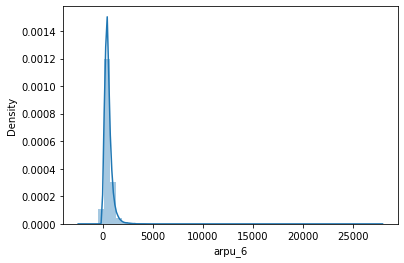

In [34]:
sns.distplot(churn_hv.arpu_6)

<AxesSubplot:xlabel='onnet_mou_8', ylabel='Density'>

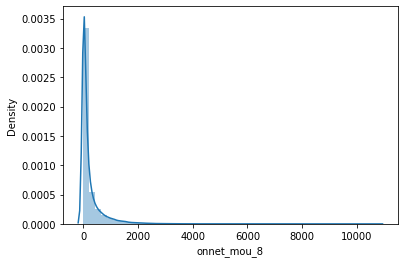

In [35]:
sns.distplot(churn_hv.onnet_mou_8)

<AxesSubplot:xlabel='offnet_mou_8', ylabel='Density'>

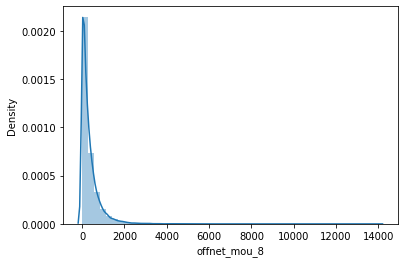

In [36]:
sns.distplot(churn_hv.offnet_mou_8)

Variables are extremely skewed towards left.

#### Bivariate

<AxesSubplot:xlabel='churn', ylabel='aon'>

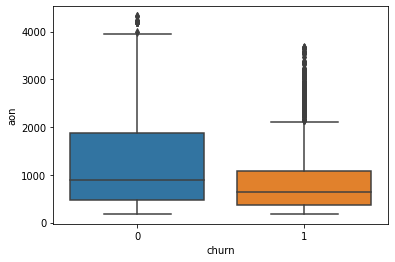

In [37]:
sns.boxplot(churn_hv.churn, churn_hv.aon)

New Customers are more likely to churn, less than 3 years.

<AxesSubplot:xlabel='churn', ylabel='av_amt_data_6_7'>

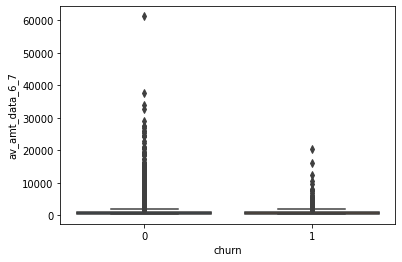

In [101]:
sns.boxplot(x=churn_hv.churn, y=churn_hv.av_amt_data_6_7)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_6'>

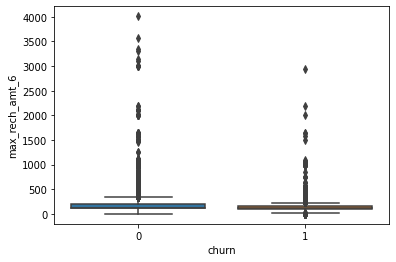

In [108]:
sns.boxplot(x=churn_hv.churn, y=churn_hv.max_rech_amt_6)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_7'>

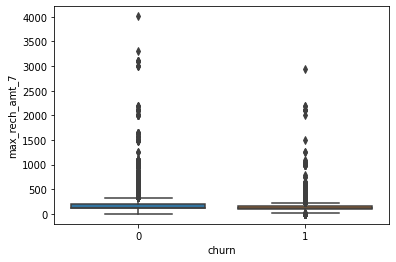

In [107]:
sns.boxplot(x=churn_hv.churn, y=churn_hv.max_rech_amt_7)

Max Recharge Amount is a strong indicator for churn.

<AxesSubplot:xlabel='churn', ylabel='std_og_mou_6'>

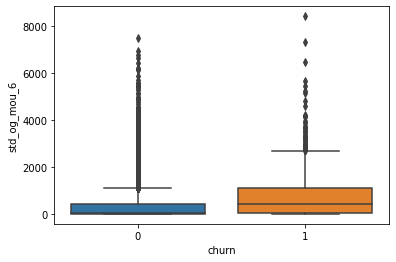

In [109]:
sns.boxplot(x=churn_hv.churn, y=churn_hv.std_og_mou_6)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_8'>

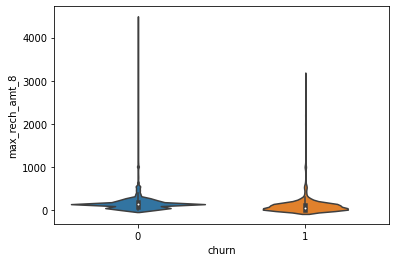

In [116]:
sns.violinplot(x=churn_hv.churn, y=churn_hv.max_rech_amt_8)

People who are likely to churn, recharge less amount. High rates can be the issue.

<AxesSubplot:xlabel='churn', ylabel='std_og_mou_8'>

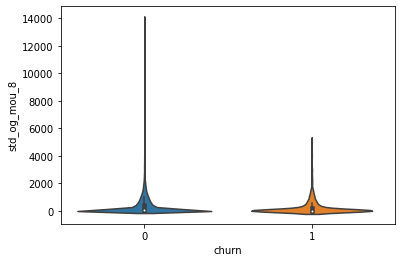

In [115]:
sns.violinplot(x=churn_hv.churn, y=churn_hv.std_og_mou_8)

Less std outgoing mou is a strong indicator of predicting churn

In [38]:
corr = churn_hv.corr()
corr

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number              1.000000  0.033922  0.025331  0.029794   
arpu_6                     0.033922  1.000000  0.717481  0.663516   
arpu_7                     0.025331  0.717481  1.000000  0.769991   
arpu_8                     0.029794  0.663516  0.769991  1.000000   
onnet_mou_6                0.008875  0.343666  0.216187  0.160028   
onnet_mou_7                0.003339  0.227770  0.315769  0.229720   
onnet_mou_8                0.004306  0.200824  0.266403  0.339563   
offnet_mou_6               0.017339  0.516198  0.363625  0.296203   
offnet_mou_7               0.007464  0.356831  0.487917  0.376715   
offnet_mou_8               0.014245  0.307798  0.395255  0.517551   
roam_ic_mou_6              0.010610  0.120665  0.097828  0.094523   
roam_ic_mou_7             -0.002831  0.087266  0.092003  0.077961   
roam_ic_mou_8              0.004013  0.096381  0.091596  0.107180   
roam_og_mou_6              0.005198  0.191755  0.140239  0.136298   
roam_og_mou_7             -0.002480  0.151179  0.178974  0.143082   
roam_og_mou_8             -0.004525  0.132664  0.151464  0.197133   
loc_og_t2t_mou_6           0.046186  0.167727  0.104790  0.099814   
loc_og_t2t_mou_7           0.042936  0.132166  0.153287  0.128039   
loc_og_t2t_mou_8           0.042073  0.129936  0.131647  0.171527   
loc_og_t2m_mou_6           0.075415  0.336023  0.216487  0.215444   
loc_og_t2m_mou_7           0.073329  0.255962  0.296892  0.261309   
loc_og_t2m_mou_8           0.076617  0.231605  0.250557  0.341277   
loc_og_t2f_mou_6           0.048924  0.141450  0.110639  0.119485   
loc_og_t2f_mou_7           0.050274  0.119906  0.134593  0.132282   
loc_og_t2f_mou_8           0.054623  0.110673  0.118146  0.153675   
loc_og_t2c_mou_6          -0.013468  0.043907  0.007229  0.001678   
loc_og_t2c_mou_7          -0.014440  0.010183  0.035712  0.020016   
loc_og_t2c_mou_8          -0.008200  0.012218  0.029452  0.050109   
loc_og_mou_6               0.080696  0.331850  0.212962  0.209770   
loc_og_mou_7               0.077769  0.256770  0.297558  0.258272   
loc_og_mou_8               0.078728  0.236778  0.250443  0.335821   
std_og_t2t_mou_6          -0.017406  0.275172  0.171442  0.111331   
std_og_t2t_mou_7          -0.021753  0.170613  0.256618  0.176017   
std_og_t2t_mou_8          -0.018550  0.144774  0.216564  0.273414   
std_og_t2m_mou_6          -0.028791  0.302808  0.211375  0.132969   
std_og_t2m_mou_7          -0.032988  0.189435  0.305647  0.206397   
std_og_t2m_mou_8          -0.028930  0.151770  0.237757  0.318816   
std_og_t2f_mou_6           0.024769  0.067165  0.053703  0.057154   
std_og_t2f_mou_7           0.017535  0.055092  0.068891  0.067653   
std_og_t2f_mou_8           0.021313  0.046594  0.052332  0.067804   
std_og_mou_6              -0.030445  0.388018  0.257258  0.164615   
std_og_mou_7              -0.036385  0.242143  0.378028  0.257500   
std_og_mou_8              -0.031221  0.197700  0.302643  0.394677   
isd_og_mou_6              -0.003093  0.457902  0.439962  0.420557   
isd_og_mou_7              -0.002464  0.442803  0.514684  0.449198   
isd_og_mou_8              -0.003054  0.436984  0.461243  0.459524   
spl_og_mou_6              -0.020461  0.122160  0.069178  0.106161   
spl_og_mou_7              -0.022807  0.071615  0.110671  0.124927   
spl_og_mou_8              -0.016320  0.048491  0.064796  0.098935   
og_others_6               -0.006670  0.053351  0.017689  0.013991   
og_others_7               -0.001167  0.025597  0.026490  0.015724   
og_others_8                0.000426  0.016231  0.017944  0.012098   
total_og_mou_6             0.017208  0.561058  0.376717  0.292783   
total_og_mou_7             0.007673  0.383829  0.533079  0.400405   
total_og_mou_8             0.013271  0.327044  0.428133  0.554323   
loc_ic_t2t_mou_6           0.030104  0.080442  0.044504  0.047662   
loc_ic_t2t_mou_7           0.026928  0.064116  0.069829  0.064715   
loc_ic_t2t_mou_8    

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

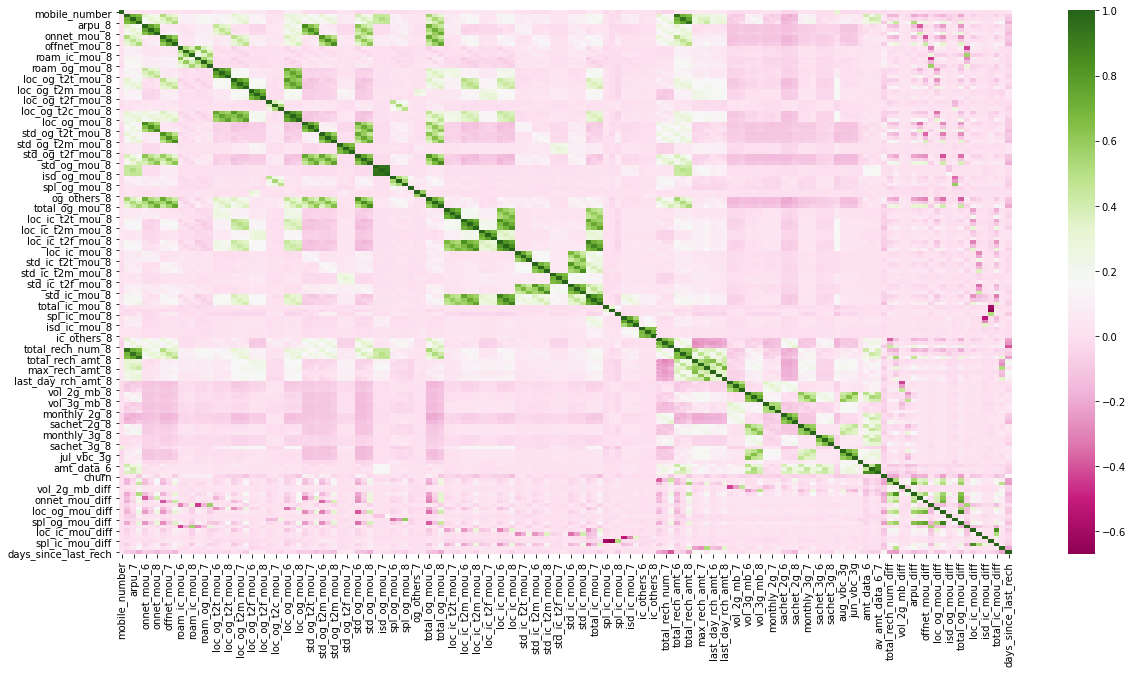

In [39]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corr, cmap="PiYG")

In [40]:
churn_hv.shape

(28504, 151)

## Data Preparation for training

### Splitting Data into Training and Test Sets

In [41]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_hv.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_hv['churn']

y.head()

1    1
2    0
3    0
4    0
5    0
Name: churn, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Standardising the features

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

## Model Building
We will build and test the following models - 

1. <a href="#Logistic-Regression">Logistic Regression</a>
2. <a href="#PCA-and-Logistic-Regression">Logistic Regression with PCA</a>
3. <a href="#Decision-Tree">Decision Tree</a>

### Logistic Regression

#### Feature Selection Using RFE

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)
rfe = rfe.fit(X,y)

ranks = rfe.ranking_

feature_indexes=[]
for i in range(len(ranks)):
    if ranks[i]==1:
        feature_indexes+=[i]

feature_indexes

[38, 49, 62, 65, 91, 92, 101, 111, 113, 124]

In [45]:
# Variables selected by RFE 
col = churn_hv.columns[feature_indexes]
print(col)
X_train_RFE = X_train[feature_indexes]

Index(['std_og_t2f_mou_7', 'og_others_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'total_rech_num_6', 'total_rech_num_7', 'last_day_rch_amt_7',
       'monthly_2g_8', 'sachet_2g_7', 'jun_vbc_3g'],
      dtype='object')


In [46]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

#### Making Predictions

In [47]:
# scaling X_test
X_test = scaler.transform(X_test)

# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.003502
1  0.040068
2  0.166937
3  0.015664
4  0.003298

In [48]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
7104       0
8897       0
3477       0
11144      0
5297       0

In [49]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0    7104      0    0.003502
1    8897      0    0.040068
2    3477      0    0.166937
3   11144      0    0.015664
4    5297      0    0.003298

In [50]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0    7104      0    0.003502          0
1    8897      0    0.040068          0
2    3477      0    0.166937          0
3   11144      0    0.015664          0
4    5297      0    0.003298          0

#### Model Evaluation

In [51]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8018,   56],
       [ 417,   61]])

In [52]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9446913002806361

Note how, Accuracy is quite high even with a lot of false negatives and false positives. Hence Accuracy is not the right metric, we have to check ROC. 

In [53]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

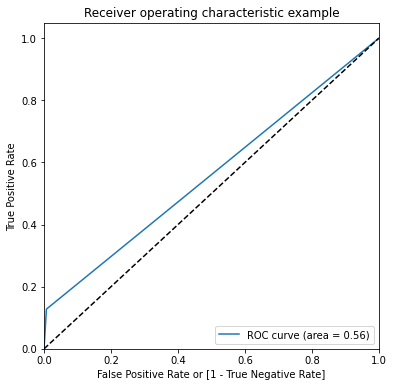

(array([0.        , 0.00693584, 1.        ]),
 array([0.        , 0.12761506, 1.        ]),
 array([2, 1, 0]))

In [54]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [55]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final.predicted))

"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

[[8018   56]
 [ 417   61]]


'0.88'

#### We see an overall AUC score of 0.88. AUC is the right metric for imbalanced dataset. 

## PCA and Logistic Regression

In [56]:
# Putting feature variable to X
X = churn_hv.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_hv['churn']

y.head()

1    1
2    0
3    0
4    0
5    0
Name: churn, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [58]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_tr.shape

(37668, 149)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_tr)

PCA(random_state=42)

#### Components from the PCA

In [60]:
pca.components_

array([[ 1.17910025e-01,  1.40007069e-01,  1.79227686e-01, ...,
         7.44839534e-03,  4.18186063e-02, -3.62815713e-02],
       [ 1.51021674e-01,  1.26659756e-01,  2.59205420e-02, ...,
        -6.46225545e-02, -2.22121792e-02, -2.25374774e-03],
       [-1.62826907e-02,  6.06421856e-02,  1.86781722e-01, ...,
         1.80210707e-01,  9.48189831e-02, -1.06815540e-01],
       ...,
       [ 0.00000000e+00,  5.23727202e-16, -1.05987339e-15, ...,
         7.39723661e-02,  7.74380560e-15, -3.40439482e-17],
       [-0.00000000e+00,  5.55111512e-16, -6.04107369e-16, ...,
         5.84078444e-02,  1.02695630e-15,  1.04083409e-16],
       [ 0.00000000e+00,  1.35308431e-16, -4.93745922e-16, ...,
        -4.92094021e-02,  4.63518113e-15,  0.00000000e+00]])

Looking at the explained variance ratio for each component

In [61]:
pca.explained_variance_ratio_

array([9.39952740e-02, 8.18599558e-02, 5.48587994e-02, 4.73641748e-02,
       3.79205237e-02, 3.64015947e-02, 3.14795115e-02, 2.81833664e-02,
       2.53562650e-02, 2.43296858e-02, 2.14171828e-02, 1.97649715e-02,
       1.84800471e-02, 1.79809838e-02, 1.74584354e-02, 1.67905155e-02,
       1.63719085e-02, 1.61584607e-02, 1.45874415e-02, 1.38858648e-02,
       1.37443857e-02, 1.33914156e-02, 1.25268697e-02, 1.22494780e-02,
       1.20019106e-02, 1.16332526e-02, 1.13707706e-02, 1.09761119e-02,
       1.07524557e-02, 1.03095447e-02, 9.99468568e-03, 9.47620756e-03,
       9.40504422e-03, 9.08302872e-03, 8.15497370e-03, 7.86931833e-03,
       7.57839214e-03, 7.22060666e-03, 7.16127415e-03, 6.72772978e-03,
       6.52639578e-03, 6.45184691e-03, 6.11536075e-03, 5.93900643e-03,
       5.89430404e-03, 5.41144113e-03, 5.31852277e-03, 5.24566866e-03,
       5.14750640e-03, 4.80602752e-03, 4.68442626e-03, 4.23529586e-03,
       4.11312580e-03, 3.99410735e-03, 3.54874463e-03, 3.40179173e-03,
      

In [62]:
# extract pca model from pipeline
# pca_ex = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0        9.40
1       17.59
2       23.07
3       27.81
4       31.60
5       35.24
6       38.39
7       41.21
8       43.74
9       46.17
10      48.32
11      50.29
12      52.14
13      53.94
14      55.69
15      57.36
16      59.00
17      60.62
18      62.08
19      63.46
20      64.84
21      66.18
22      67.43
23      68.66
24      69.86
25      71.02
26      72.16
27      73.25
28      74.33
29      75.36
30      76.36
31      77.31
32      78.25
33      79.16
34      79.97
35      80.76
36      81.52
37      82.24
38      82.95
39      83.63
40      84.28
41      84.93
42      85.54
43      86.13
44      86.72
45      87.26
46      87.79
47      88.32
48      88.83
49      89.31
50      89.78
51      90.20
52      90.62
53      91.02
54      91.37
55      91.71
56      92.05
57      92.37
58      92.69
59      93.00
60      93.29
61      93.59
62      93.88
63      94.16
64      94.43
65      94.71
66      94.96
67      95.21
68      95.45
69      95.68
70      95.90
71    

~ 50 components explain 90% variance

~ 66 components explain 95% variance

Making a scree plot for the explained variance

In [63]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative variance explained')

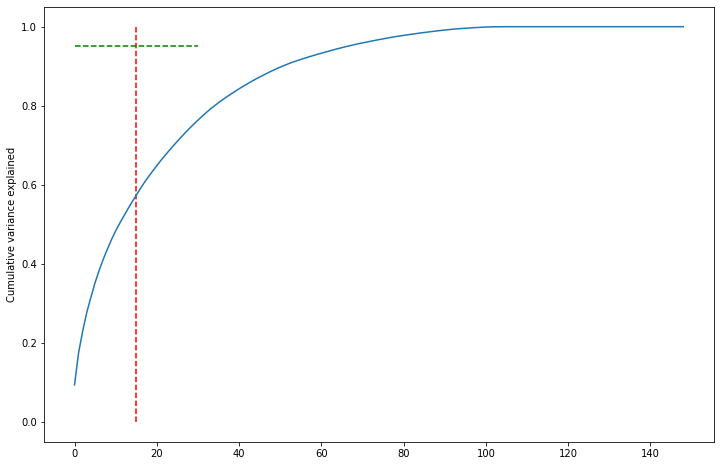

In [64]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 66 components

In [65]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=66)
df_train_pca = pca_final.fit_transform(X_tr)
df_train_pca.shape

(37668, 66)

In [66]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(66, 66)

Plotting the heatmap of the corr matrix

<Figure size 1512x1512 with 0 Axes>

<AxesSubplot:>

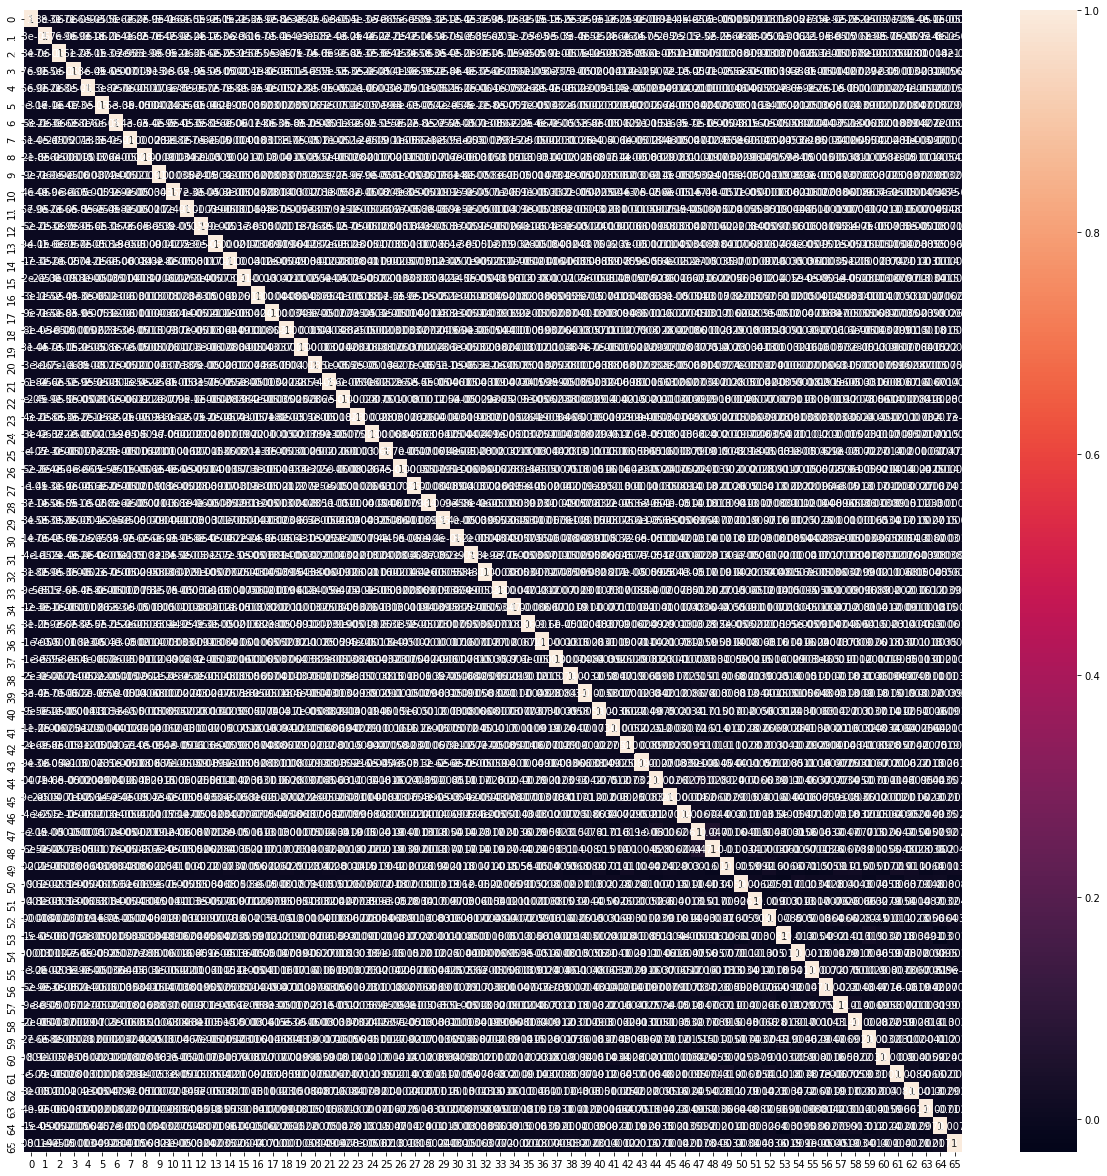

In [67]:
plt.figure(figsize=[21,21])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [68]:
X_test = scaler.transform(X_test)
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8552, 66)

### Applying logistic regression on the data on our Principal components

In [69]:
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_tr)

Making predictions on the test set

In [70]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_test

array([[0.92506126, 0.07493874],
       [0.7599342 , 0.2400658 ],
       [0.30052003, 0.69947997],
       ...,
       [0.01380852, 0.98619148],
       [0.99406476, 0.00593524],
       [0.99361416, 0.00638584]])

In [71]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

"AUC: {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'AUC: 0.86'

Conclusions from the above model:

- #### Model has 0.86 AUC and 65 features can explain 95% variance in the dataset.



## Decision Tree

In [72]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 149)
(37666,)


skipping standardization because decision tree doesn't require it. It is also not affected too much with multicollinearity

In [73]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37666, 111)
[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  20
  21  22  23  24  25  26  28  29  30  31  33  34  37  40  41  42  45  46
  47  48  51  53  55  56  57  58  60  61  62  63  65  66  67  68  69  70
  72  76  79  80  84  87  88  90  91  93  94  95  96  97  98  99 100 101
 103 104 105 106 107 108 109 110 112 113 114 115 116 117 120 121 122 123
 124 126 127 128 129 130 131 132 133 134 135 137 138 139 140 141 142 144
 146 147 148]


In [74]:
# feature vector for decision tree
lasso_features = list(churn_hv.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_mou_

In [75]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [76]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8075
           1       0.28      0.66      0.39       477

    accuracy                           0.89      8552
   macro avg       0.63      0.78      0.67      8552
weighted avg       0.94      0.89      0.91      8552



In [77]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[7268  807]
 [ 163  314]]
Decision Tree - Accuracy : 0.8865762394761459


In [78]:
round(roc_auc_score(y_test, y_pred1),2)

0.78

The AUC is only 0.78

#### Fine tuning the hyper parameters

In [79]:
# Grid Search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth': range(1, 25)}

decision_tree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
tree = GridSearchCV(decision_tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 25)}, return_train_score=True,
             scoring='accuracy')

In [80]:
# plotting grid search results

score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.199974      0.005237         0.001968        0.000224   
1       0.371299      0.005791         0.002058        0.000227   
2       0.537182      0.004407         0.002047        0.000186   
3       0.702899      0.013207         0.001992        0.000138   
4       0.844550      0.021856         0.001986        0.000075   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.777542           0.804726   
1               2  {'max_depth': 2}           0.807805           0.833001   
2               3  {'max_depth': 3}           0.829705           0.851321   
3               4  {'max_depth': 4}           0.840457           0.870038   
4               5  {'max_depth': 5}           0.861826           0.879331   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.816142           0.809770           0.807115         0.803059   
1           0.841630           0.833931           0.829948         0.829263   
2           0.864065           0.859419           0.855569         0.852016   
3           0.880526           0.872959           0.874552         0.867706   
4           0.892208           0.886499           0.884375         0.880848   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.013316               24            0.809438            0.802642   
1        0.011399               23            0.835192            0.829854   
2        0.011923               22            0.859385            0.853947   
3        0.014048               21            0.877074            0.872432   
4        0.010369               20            0.896555            0.882985   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.799788            0.801381            0.802044   
1            0.828295            0.826834            0.829655   
2            0.850828            0.851890            0.853184   
3            0.869147            0.871337            0.870740   
4            0.882388            0.887067            0.883052   

   mean_train_score  std_train_score  
0          0.803059         0.003329  
1          0.829966         0.002829  
2          0.853847         0.002969  
3          0.872146         0.002683  
4          0.886410         0.005339

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

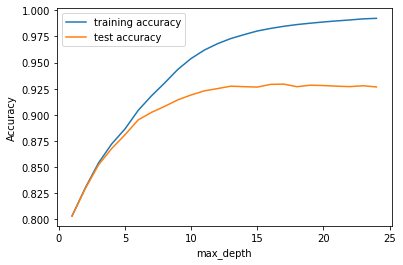

In [81]:
# plotting accuracies v/s max_depth

plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max depth 14 seems to be the best fit

In [82]:
# optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_leaf': range(5, 100, 20)}

decision_tree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(decision_tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 100, 20)},
             return_train_score=True, scoring='accuracy')

In [83]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.867280      0.098118         0.002298        0.000114   
1       2.284041      0.070717         0.002186        0.000095   
2       2.140517      0.041038         0.002104        0.000010   
3       1.999213      0.064436         0.002203        0.000124   
4       1.890162      0.061968         0.002188        0.000106   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.888505   
1                     25  {'min_samples_leaf': 25}           0.880674   
2                     45  {'min_samples_leaf': 45}           0.877091   
3                     65  {'min_samples_leaf': 65}           0.868065   
4                     85  {'min_samples_leaf': 85}           0.864614   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.921678           0.930041           0.930041           0.928183   
1           0.911987           0.919819           0.913846           0.909996   
2           0.899376           0.911722           0.910660           0.907208   
3           0.897385           0.902695           0.904819           0.900571   
4           0.892871           0.898181           0.897385           0.894995   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.919690        0.015892                1            0.976570   
1         0.907265        0.013695                2            0.937940   
2         0.901211        0.012813                3            0.923238   
3         0.894707        0.013546                4            0.914675   
4         0.889609        0.012636                5            0.907540   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.972655            0.971261            0.972057   
1            0.931736            0.930840            0.929247   
2            0.917665            0.913384            0.915574   
3            0.910397            0.907211            0.906415   
4            0.901371            0.901039            0.900508   

   split4_train_score  mean_train_score  std_train_score  
0            0.973418          0.973192         0.001831  
1            0.929944          0.931941         0.003114  
2            0.915840          0.917140         0.003338  
3            0.906349          0.909009         0.003196  
4            0.900209          0.902133         0.002733

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_sample_leaf')

Text(0, 0.5, 'Accuracy')

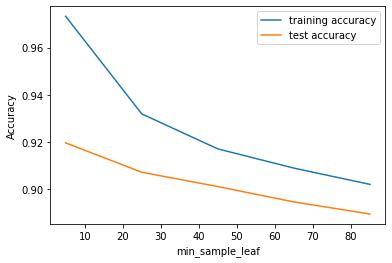

In [84]:
# plot accuracies v/s min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_leaf = 5 seems to be the optimal one

In [85]:
# min sample split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split': range(5, 100, 20)}

decision_tree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

tree = GridSearchCV(decision_tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 100, 20)},
             return_train_score=True, scoring='accuracy')

In [86]:
# scores of GridSearch
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.534162      0.187964         0.002346        0.000022   
1       3.588425      0.186104         0.002364        0.000071   
2       3.572675      0.152540         0.002343        0.000054   
3       3.472674      0.184399         0.002334        0.000068   
4       3.462330      0.161153         0.002377        0.000183   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.897000   
1                      25  {'min_samples_split': 25}           0.885453   
2                      45  {'min_samples_split': 45}           0.879612   
3                      65  {'min_samples_split': 65}           0.877356   
4                      85  {'min_samples_split': 85}           0.872710   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.928581           0.935218           0.934289           0.932829   
1           0.923005           0.927784           0.927121           0.923005   
2           0.917563           0.921147           0.922607           0.916235   
3           0.908801           0.917695           0.919288           0.911456   
4           0.907341           0.915837           0.915970           0.910793   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.925584        0.014471                1            0.996648   
1         0.917274        0.016036                2            0.974844   
2         0.911433        0.016077                3            0.962897   
3         0.906919        0.015279                4            0.957553   
4         0.904530        0.016238                5            0.948526   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.995321            0.996084            0.995188   
1            0.973750            0.973285            0.973816   
2            0.960508            0.959612            0.958882   
3            0.949059            0.949856            0.948561   
4            0.942853            0.939867            0.940165   

   split4_train_score  mean_train_score  std_train_score  
0            0.996018          0.995852         0.000536  
1            0.971427          0.973424         0.001121  
2            0.955298          0.959440         0.002473  
3            0.947466          0.950499         0.003611  
4            0.942190          0.942720         0.003120

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

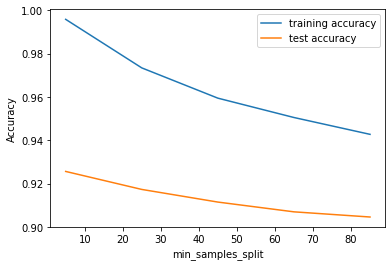

In [87]:
# plotting accuracies v/s min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf 5 seems to be optimal

In [88]:
# Final tuning

param_grid = {
    'max_depth': range(3, 20, 3),
    'min_samples_leaf': range(5, 100, 50),
    'min_samples_split': range(5, 100, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = decision_tree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  6.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 20, 3),
                         'min_samples_leaf': range(5, 100, 50),
                         'min_samples_split': range(5, 100, 50)},
             verbose=1)

In [89]:
# grid_search results
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.786431      0.009390         0.001885        0.000028   
1        0.780573      0.006640         0.001895        0.000037   
2        0.779298      0.004553         0.001945        0.000067   
3        0.775954      0.004718         0.001913        0.000059   
4        1.520660      0.010084         0.001955        0.000037   
5        1.525081      0.013318         0.001986        0.000048   
6        1.492419      0.005588         0.002077        0.000124   
7        1.492147      0.004484         0.001962        0.000023   
8        2.134091      0.021454         0.002017        0.000020   
9        2.112899      0.021170         0.002089        0.000036   
10       1.983778      0.026102         0.002111        0.000133   
11       2.009056      0.030328         0.002009        0.000027   
12       2.509213      0.036670         0.002188        0.000149   
13       2.481260      0.028516         0.002185        0.000122   
14       2.239022      0.050547         0.002100        0.000074   
15       2.247763      0.043880         0.002081        0.000029   
16       2.770613      0.054879         0.002150        0.000033   
17       2.694880      0.054826         0.002127        0.000047   
18       2.317005      0.069344         0.002174        0.000173   
19       2.344971      0.080314         0.002095        0.000033   
20       2.838468      0.063023         0.002192        0.000036   
21       2.752817      0.060884         0.002117        0.000026   
22       2.330533      0.069025         0.002115        0.000098   
23       2.328359      0.080156         0.002163        0.000064   
24       0.512170      0.008379         0.001909        0.000127   
25       0.506689      0.003343         0.001919        0.000121   
26       0.507003      0.006174         0.001924        0.000138   
27       0.506276      0.003525         0.001879        0.000027   
28       0.951548      0.001691         0.001938        0.000031   
29       0.951521      0.007844         0.001981        0.000040   
30       0.945732      0.006240         0.001948        0.000070   
31       0.942491      0.004953         0.001934        0.000039   
32       1.363577      0.008992         0.001968        0.000026   
33       1.360888      0.009498         0.001977        0.000046   
34       1.307918      0.006191         0.001960        0.000015   
35       1.305040      0.006209         0.001969        0.000030   
36       1.729096      0.004600         0.002075        0.000007   
37       1.714385      0.007126         0.002129        0.000127   
38       1.588864      0.012526         0.002050        0.000048   
39       1.591800      0.011805         0.002078        0.000061   
40       2.051297      0.013263         0.002232        0.000241   
41       2.025961      0.011469         0.002212        0.000112   
42       1.832174      0.022254         0.002107        0.000084   
43       1.822568      0.020955         0.002098        0.000053   
44       2.308054      0.014967         0.002161        0.000030   
45       2.294204      0.018551         0.002157        0.000054   
46       1.951465      0.024199         0.002136        0.000088   
47       1.942880      0.022541         0.002149        0.000031   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               3                      5   
1          entropy               3                      5   
2          entropy               3                     55   
3          entropy               3                     55   
4          entropy               6                      5   
5          entropy               6                      5   
6          entropy               6                     55   
7          entropy               6                     55   
8          entropy               9                      5   
9          entropy               9                      5   


Best Accuracy 0.9221852659906006


In [90]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=5)


In [91]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [92]:
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8961646398503275


In [93]:
y_preds = clf_gini.predict_proba(X_test)
y_preds

array([[0.99727273, 0.00272727],
       [0.0794101 , 0.9205899 ],
       [0.99727273, 0.00272727],
       ...,
       [0.99092456, 0.00907544],
       [0.01834061, 0.98165939],
       [1.        , 0.        ]])

In [94]:
round(metrics.roc_auc_score(y_test, y_preds[:,1]),2)

0.72

Conclusion from the above Decision Tree model - 
#### 0.72 auc on the test dataset


### Conclusion

**RFE with Logistic Regression** would be the go to model because it attains good ROC of 0.88 because it is more interpretable.

### Business Insights

- Telecom company needs to pay attention to the recharge rates. Max Recharge Amount is a strong feature to predict churn.

- Cutomers with tenure less than 4 yrs are more likely to churn.

- In order to resolve the issues above, The company can reach out to customers and do surveys. Company should also analyze if there are any complaints raised by the customers.